# Pra UAS

## Kekambuhan Kanker Tiroid Terdiferensiasi

## Data Understanding

## Sumber Data Set

Data Set Diambil dari :

https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence

Borzooei, S. & Tarokhian, A. (2023). Differentiated Thyroid Cancer Recurrence [Dataset].UCI Machine Learning Repository.

 https://doi.org/10.24432/C5632J.

## Penjelasan Fitur dan Variabel

Dataset ini digunakan untuk memprediksi apakah pasien kanker tiroid mengalami kekambuhan setelah menjalani pengobatan. Setiap baris berisi data satu pasien, dengan sejumlah fitur klinis dan riwayat terapi.

Fitur-fitur yang digunakan antara lain:

- Usia (Age) dan Jenis kelamin (Gender) pasien,

- Stadium kanker (T_stage, N_stage, M_stage) sesuai sistem TNM,

- Lokasi utama tumor (Primary_site) dan tipe histologis kanker (Histologic_type),

- Jenis operasi (Surgery_type) serta riwayat terapi radiasi dan kemoterapi,

- Stadium patologi (Pathologic_stage),

- Ukuran tumor (Tumor_size), jumlah kelenjar getah bening yang diperiksa (Lymph_node_examined_count) dan yang positif kanker (Positive_LN_count),

- Serta penyebaran tumor ke jaringan sekitarnya (Extension).

Sementara itu, variabel target adalah Recurrence, yaitu status kekambuhan kanker (1 = kambuh, 0 = tidak kambuh).

## Integrasi Data

untuk mengambil data agar dapat diolah, perlu untuk menginstall package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. peritah untuk mengambil data dari UCI dataset dapat di lihat ketika menekan tombol import in python pada datase yang diinginkan dan ikuti perintah tersebut agar data dapat diambil dari UCI dataset. Contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berikut:

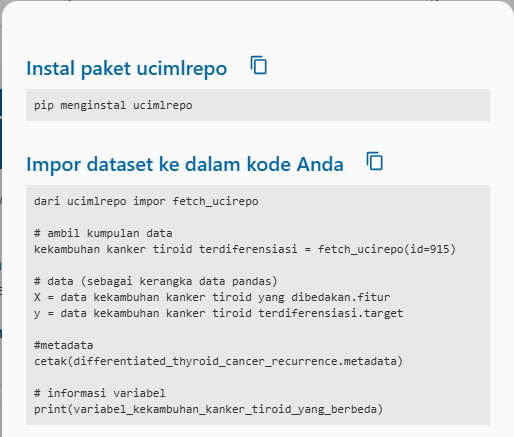

In [32]:
pip install ucimlrepo

In [33]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
differentiated_thyroid_cancer_recurrence = fetch_ucirepo(id=915)

# data (as pandas dataframes)
X = differentiated_thyroid_cancer_recurrence.data.features
y = differentiated_thyroid_cancer_recurrence.data.targets

 ## data (as pandas dataframes)
data = differentiated_thyroid_cancer_recurrence.data.original
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("differentiated_thyroid_cancer_recurrence.csv", index=True)
print(data.info()) #untuk menampilkan info fitur-fitur yang ada di tabel

print(data.head()) #untuk menampilkan 5 baris pertama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

## Visualisasi Data

In [34]:
display(data) #display dataset

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


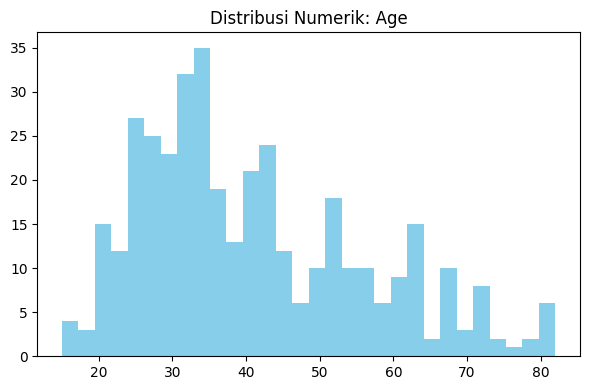

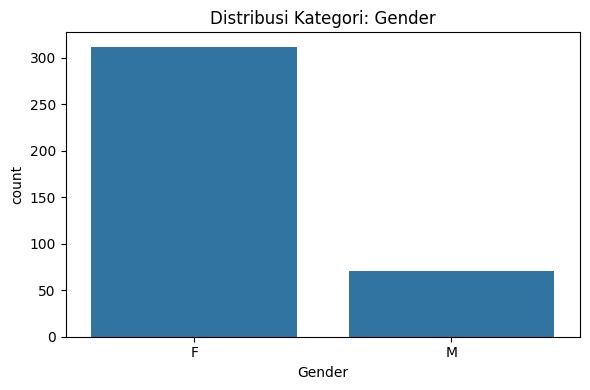

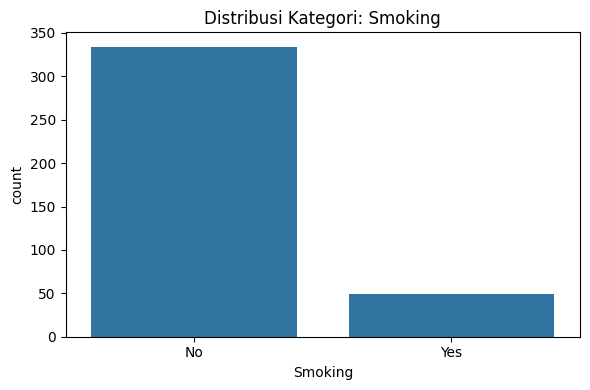

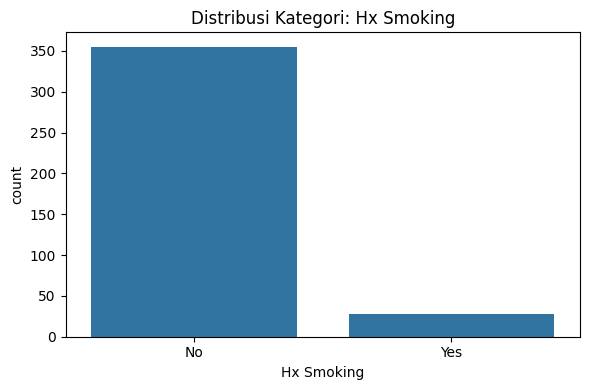

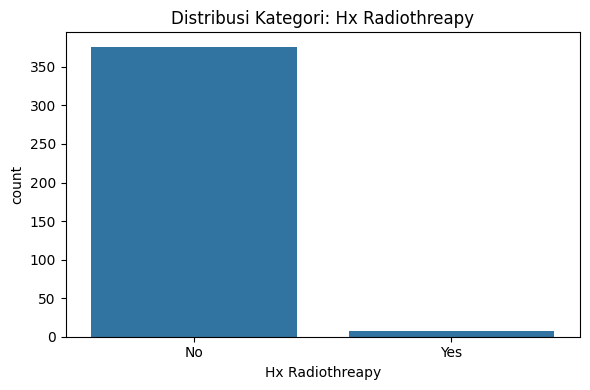

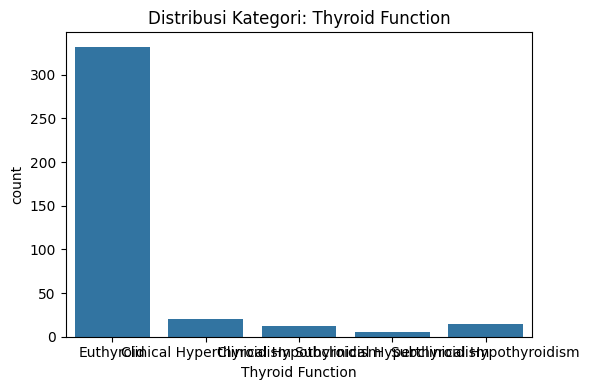

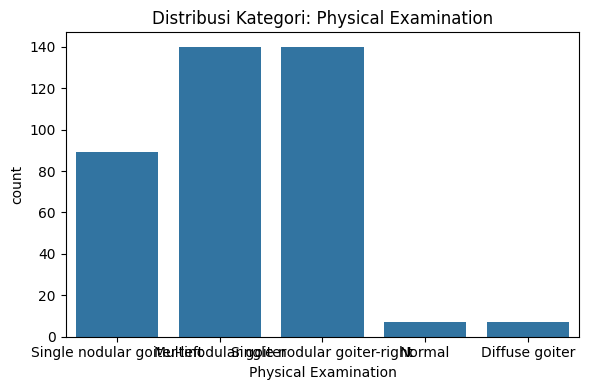

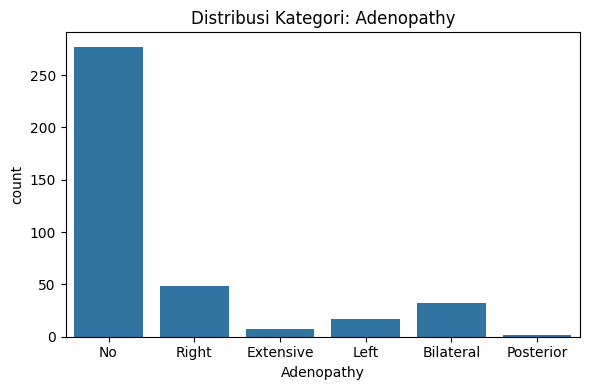

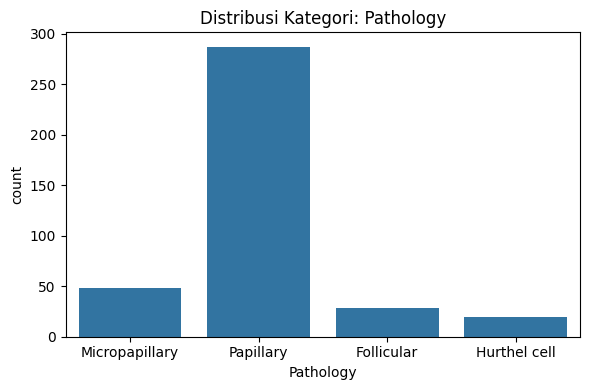

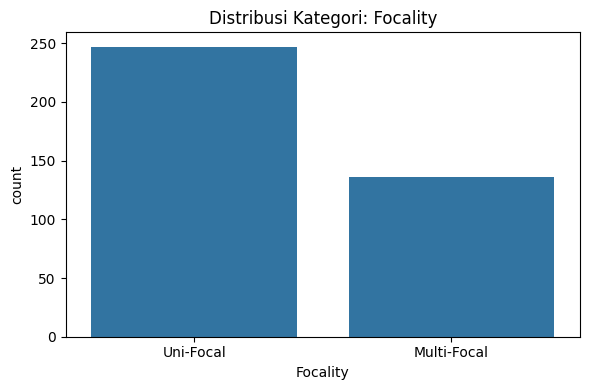

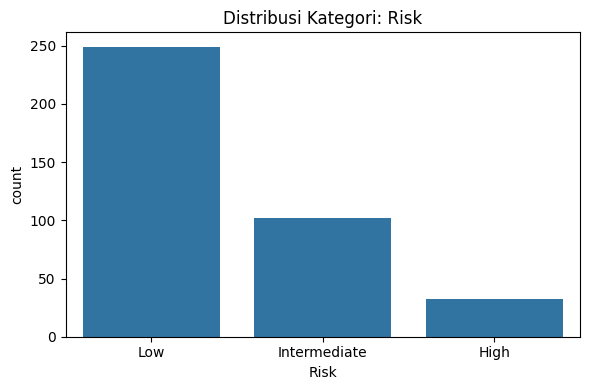

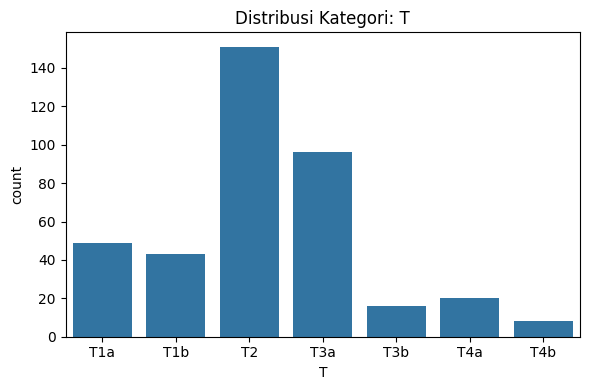

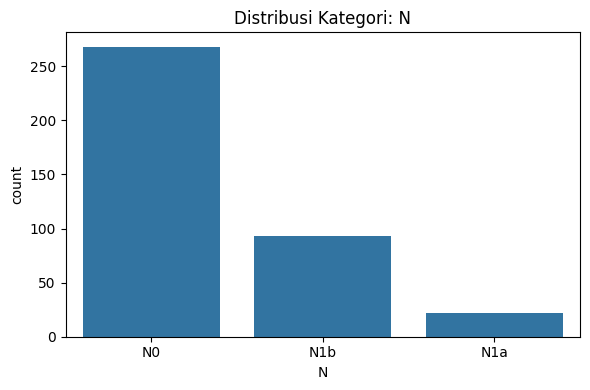

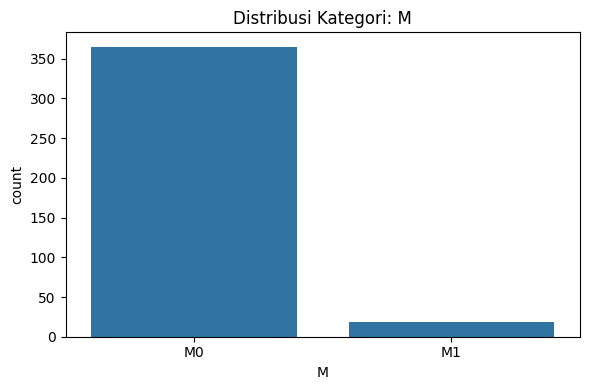

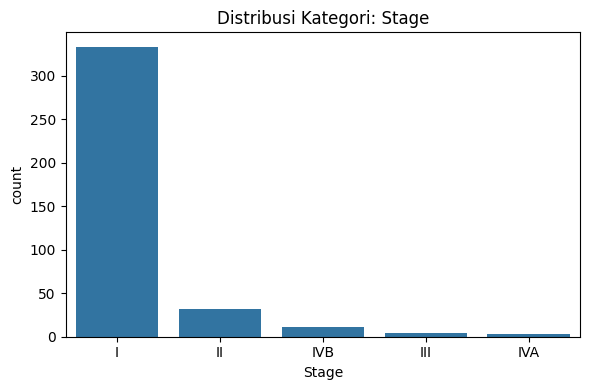

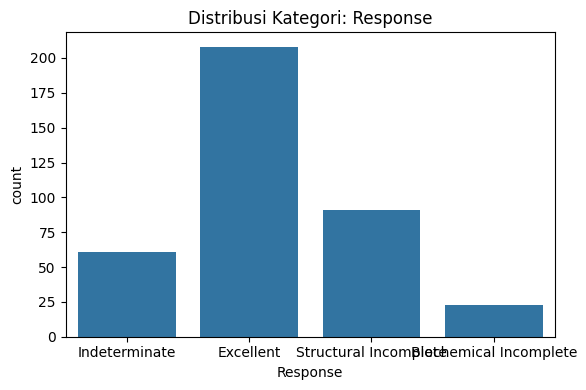

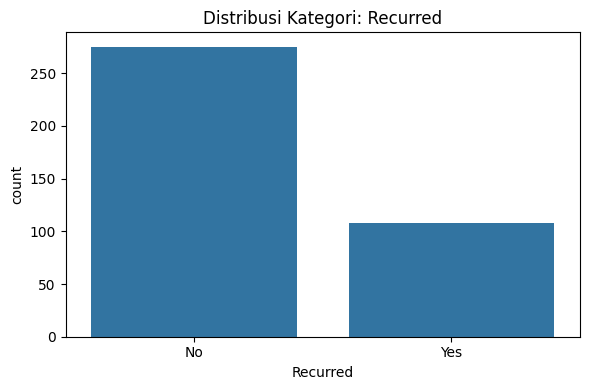

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop semua kolom
for column in data.columns:
    plt.figure(figsize=(6, 4))
    if data[column].dtype == 'object' or data[column].nunique() < 10:
        sns.countplot(x=column, data=data)
        plt.title(f'Distribusi Kategori: {column}')
    else:
        plt.hist(data[column].dropna(), bins=30, color='skyblue')
        plt.title(f'Distribusi Numerik: {column}')
    plt.tight_layout()
    plt.show()


### Missing Value

In [36]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
Empty DataFrame
Columns: [Age, Gender, Smoking, Hx Smoking, Hx Radiothreapy, Thyroid Function, Physical Examination, Adenopathy, Pathology, Focality, Risk, T, N, M, Stage, Response, Recurred]
Index: []
Missing Value Counts:
Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


## Preprocessing Data

### Transformasi Data


Mengimpor LabelEncoder dari Scikit-learn, yaitu kelas untuk mengubah nilai teks menjadi angka

In [37]:
from sklearn.preprocessing import LabelEncoder

# Salin data agar tidak mengubah yang asli
df = data.copy()

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode semua kolom kategorikal
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

print("Transformasi kategorikal selesai.")


Transformasi kategorikal selesai.


### Normalisasi Data


Melakukan normalisasi data numerik menggunakan Min-Max Scaling, yaitu mengubah nilai-nilai angka agar berada dalam rentang 0 hingga 1.

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi hanya kolom numerik
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Normalisasi fitur numerik selesai.")

Normalisasi fitur numerik selesai.


### Split Data

In [39]:
from sklearn.model_selection import train_test_split

# Misalnya targetnya kolom 'Recurred'
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Split 80% data latih, 20% data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data berhasil di-split.")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Data berhasil di-split.
Train shape: (306, 16), Test shape: (77, 16)


### Hasil Data setelah di Preprocessing

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load dataset dari file (jika belum dimuat)
# data = pd.read_csv("differentiated_thyroid_cancer_recurrence.csv")

# Tangani missing value
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            data[column] = data[column].fillna(data[column].mode()[0])
        else:
            data[column] = data[column].fillna(data[column].median())

# Copy dan transformasi data
df = data.copy()
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Normalisasi fitur numerik
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split fitur dan target
X = df.drop('Recurred', axis=1)
y = df['Recurred']

# Gabungkan kembali fitur dan target
df_processed = pd.concat([X, y], axis=1)

# Tampilkan hasil akhir
print("Total baris dataset ini adalah =", len(df_processed))
print("Visualisasi dataset setelah preprocessing lengkap:\n")
print(df_processed.to_string(index=False))  # Menampilkan seluruh isi (hati-hati kalau datanya besar!)


Total baris dataset ini adalah = 383
Visualisasi dataset setelah preprocessing lengkap:

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  Physical Examination  Adenopathy  Pathology  Focality  Risk        T   N   M  Stage  Response  Recurred
0.179104     0.0      0.0         0.0              0.0              0.50                  0.75         0.6   0.666667       1.0   1.0 0.000000 0.0 0.0   0.00  0.666667       0.0
0.283582     0.0      0.0         1.0              0.0              0.50                  0.25         0.6   0.666667       1.0   1.0 0.000000 0.0 0.0   0.00  0.333333       0.0
0.223881     0.0      0.0         0.0              0.0              0.50                  1.00         0.6   0.666667       1.0   1.0 0.000000 0.0 0.0   0.00  0.333333       0.0
0.701493     0.0      0.0         0.0              0.0              0.50                  1.00         0.6   0.666667       1.0   1.0 0.000000 0.0 0.0   0.00  0.333333       0.0
0.701493     0.0     

## Modeling

Modeling adalah proses membangun sebuah model matematis atau algoritmik berdasarkan data yang tersedia, dengan tujuan untuk memahami pola atau hubungan antar variabel dalam data, serta untuk membuat prediksi atau keputusan otomatis pada data baru.

Dalam konteks machine learning, modeling merupakan inti dari keseluruhan proses pembelajaran mesin, yaitu membuat model prediktif atau deskriptif dari data latih (training data), dan kemudian mengujinya pada data uji (testing data) untuk menilai kinerjanya.

## Pemodelan Prediksi Kekambuhan Kanker Tiroid Menggunakan Decision Tree

Pemodelan dalam penelitian ini bertujuan untuk **mengklasifikasikan kemungkinan kekambuhan (recurrence)** pada pasien kanker tiroid berdiferensiasi berdasarkan sejumlah fitur klinis, seperti usia, jenis kelamin, ukuran tumor, stadium kanker, jenis terapi yang diterima, serta karakteristik jaringan kanker. Variabel target yang digunakan terdiri dari dua kelas, yaitu **kambuh (1)** dan **tidak kambuh (0)**.

Model klasifikasi yang digunakan adalah **Decision Tree Classifier**, yaitu metode supervised learning yang bekerja berdasarkan struktur bercabang seperti pohon. Setiap percabangan menggambarkan keputusan yang diambil berdasarkan nilai dari fitur tertentu, sedangkan ujung cabangnya (daun) mewakili hasil klasifikasi.


1. Pembagian Dataset: Data Latih dan Data Uji

Tahap awal pemodelan melibatkan pembagian dataset menjadi dua bagian, yaitu:

* Data Latih (Training Set): digunakan untuk melatih model agar mampu mengenali pola dari data historis.
* Data Uji (Testing Set): digunakan untuk menguji kinerja model terhadap data baru yang belum pernah dilihat sebelumnya.

Pada eksperimen ini digunakan proporsi 80% untuk data latih dan 20% untuk data uji, yang merupakan rasio umum dalam banyak eksperimen machine learning.


2. Pra-pemrosesan Data**

Sebelum model dilatih, dilakukan beberapa tahap **pra-pemrosesan data**, di antaranya:

* Transformasi kategori ke numerik: Seluruh fitur kategorikal seperti jenis kelamin, tipe histologis, dan jenis terapi dikonversi ke bentuk numerik menggunakan Label Encoding agar bisa diproses oleh algoritma.
* Normalisasi fitur numerik: Fitur numerik seperti `Age`, `Tumor_size`, dan `Positive_LN_count` dinormalisasi menggunakan MinMaxScaler agar memiliki skala yang seragam, terutama untuk algoritma yang sensitif terhadap perbedaan skala seperti KNN.
* Pemisahan fitur dan target: Fitur-fitur prediktor dipisahkan dari target `Recurrence`.



3. Pelatihan Model Decision Tree

Model dilatih menggunakan algoritma Decision Tree, di mana:

* Setiap node akan membagi data berdasarkan fitur yang paling mengurangi impuritas (biasanya diukur dengan Gini Index).
* Proses pembagian berlangsung secara bertingkat hingga mencapai batas tertentu, misalnya kedalaman maksimum (`max_depth = 5`) untuk mencegah overfitting.


### 4. Evaluasi Model

Setelah pelatihan, model dievaluasi menggunakan:

* Akurasi: mengukur persentase prediksi yang benar dari keseluruhan data uji.
* Classification Report: memberikan metrik tambahan seperti precision, recall, dan F1-score untuk masing-masing kelas.
* Confusion Matrix: menampilkan bagaimana prediksi model tersebar pada kelas sebenarnya.
* Visualisasi pohon keputusan: membantu memahami fitur apa yang paling memengaruhi keputusan model, urutan pengecekan fitur, dan logika klasifikasi.



5. Prediksi Kekambuhan Pasien Baru

Setelah proses pelatihan dan evaluasi selesai, model dapat digunakan untuk:

* Memprediksi kemungkinan kekambuhan pada pasien baru berdasarkan data klinis yang tersedia.
* Mengidentifikasi fitur-fitur penting yang paling berpengaruh terhadap risiko kekambuhan, seperti stadium tumor, ukuran tumor, atau status metastasis.


Kesimpulan

Decision Tree merupakan metode yang efektif untuk kasus klasifikasi seperti prediksi kekambuhan kanker tiroid karena:

* Dapat menangani kombinasi data numerik dan kategorikal,
* Tidak memerlukan normalisasi khusus untuk data numerik (meskipun tetap disarankan),
* Menyediakan interpretasi visual yang memudahkan pemahaman logika model.

Model ini dapat menjadi alat bantu pengambilan keputusan klinis berbasis data, terutama dalam menentukan langkah lanjutan terhadap pasien yang berpotensi mengalami kekambuhan kanker.

Akurasi: 0.961038961038961

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        55
         1.0       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.97      0.93      0.95        77
weighted avg       0.96      0.96      0.96        77



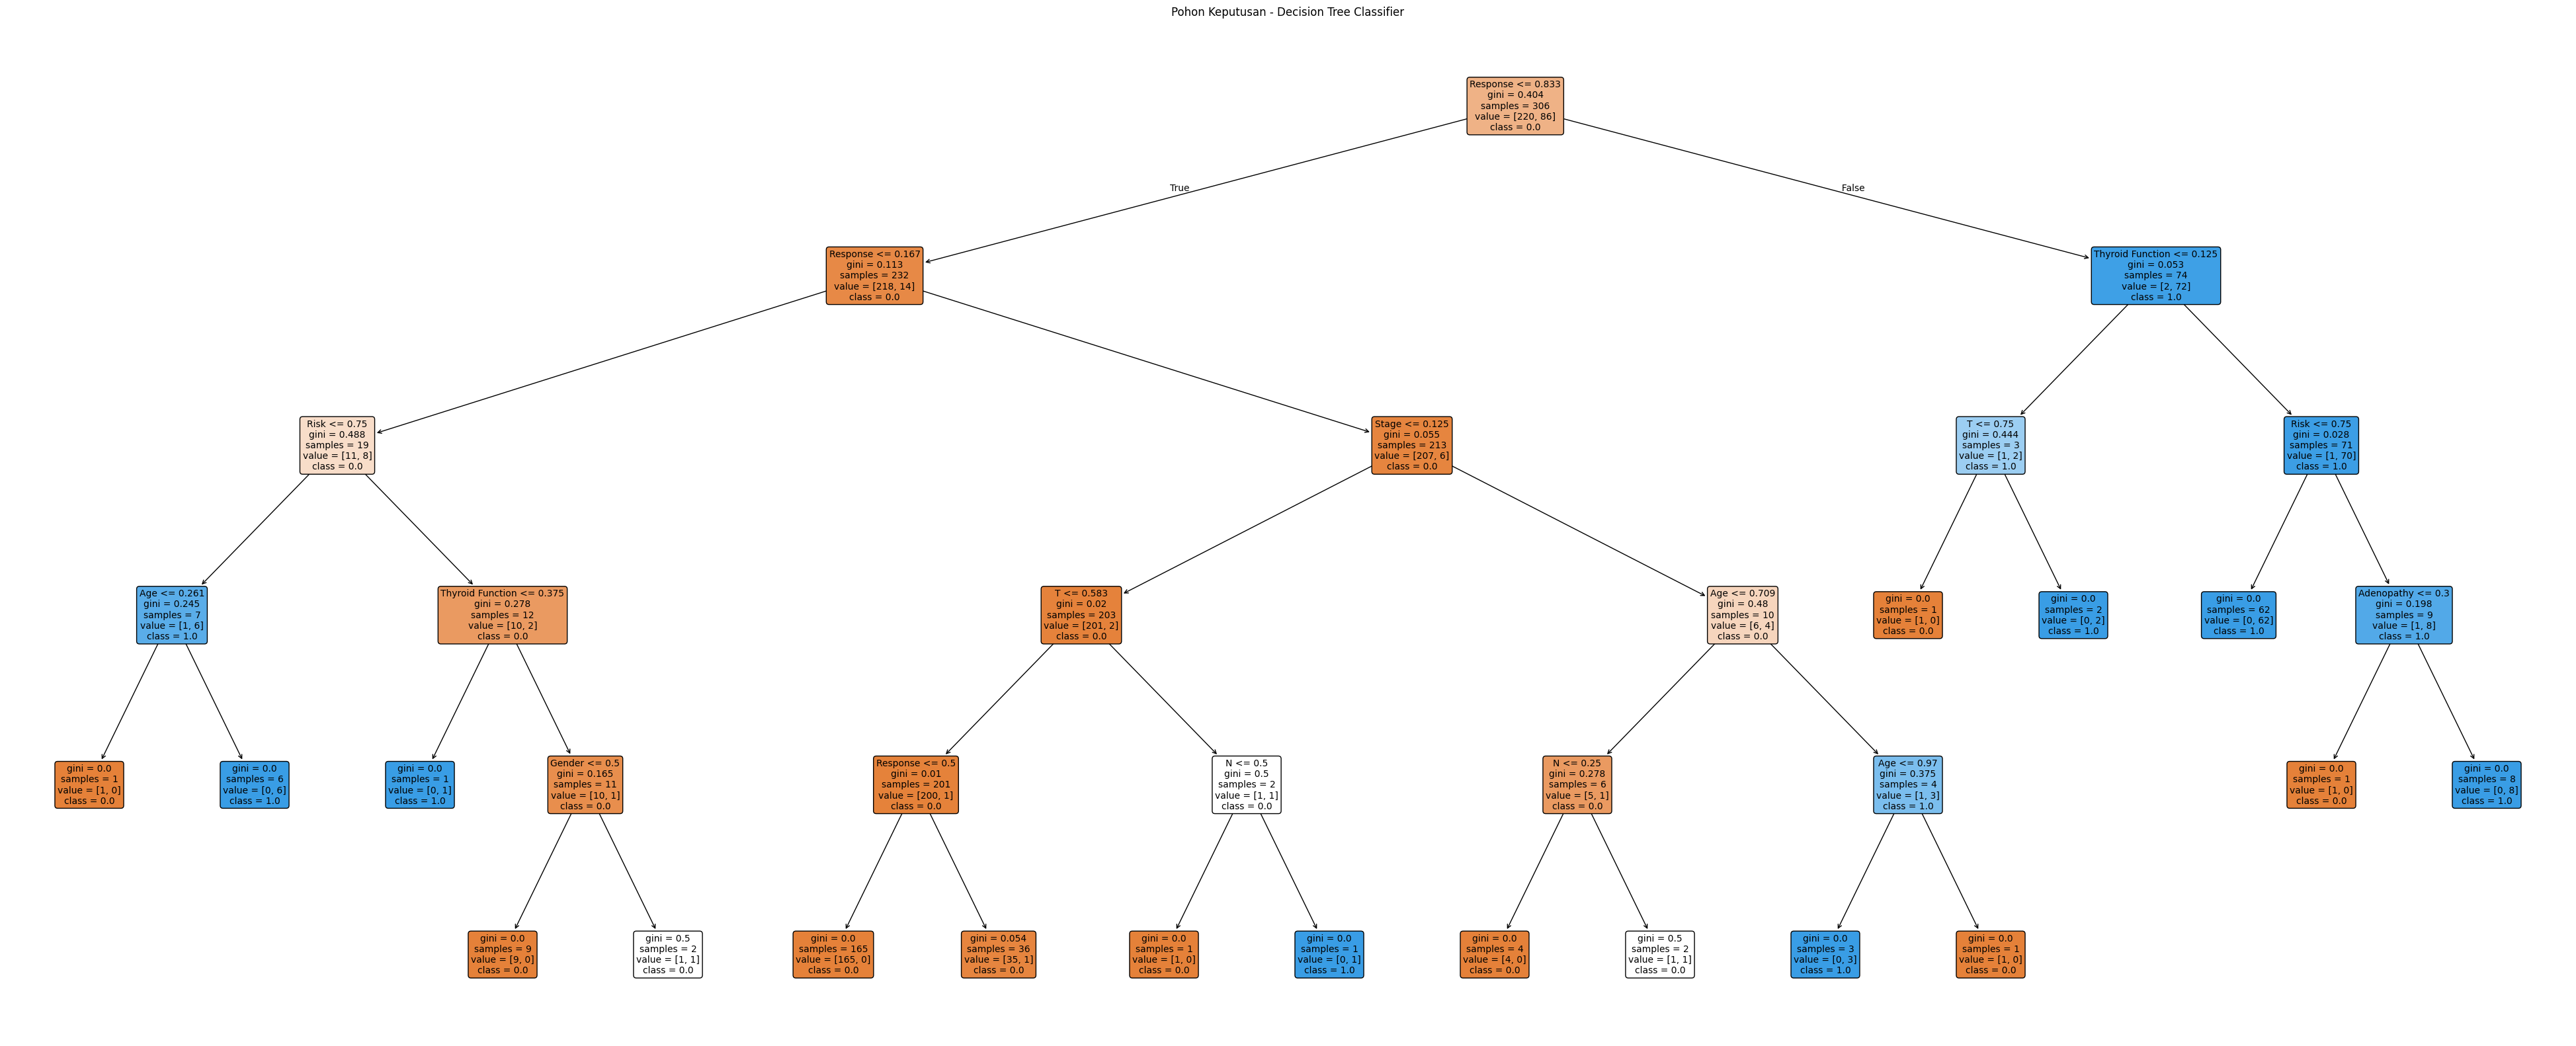

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 7. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 8. Evaluasi Model ===
y_pred = clf.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Visualisasi Struktur Pohon ===
plt.figure(figsize=(50, 20))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(c) for c in clf.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Pohon Keputusan - Decision Tree Classifier")
plt.show()


Berikut adalah **parafrase penjelasan** yang sudah **disesuaikan dengan data kanker tiroid** milikmu menggunakan metode **K-Nearest Neighbors (KNN)**:

---

## Pemodelan Kekambuhan Kanker Tiroid dengan K-Nearest Neighbors (KNN)

Model K-Nearest Neighbors (KNN) digunakan dalam pemodelan ini untuk memprediksi apakah pasien kanker tiroid mengalami kekambuhan atau tidak, berdasarkan sejumlah fitur klinis seperti usia, jenis kelamin, ukuran tumor, status limfosit, jenis terapi, dan karakteristik kanker lainnya.

KNN merupakan metode pembelajaran berbasis instance (instance-based learning), di mana prediksi terhadap data baru dilakukan dengan mengidentifikasi beberapa “tetangga” terdekat dalam ruang fitur, kemudian mengklasifikasikannya berdasarkan mayoritas label tetangga tersebut.


1. Pembagian Dataset: Data Latih dan Data Uji

Sama seperti pendekatan supervised learning lainnya, data pasien dibagi menjadi dua kelompok utama:

* Data Latih (Training Set): digunakan sebagai referensi untuk proses pencocokan (tetangga).
* Data Uji (Testing Set): digunakan untuk mengukur kemampuan model dalam mengklasifikasikan pasien baru.

Dalam percobaan ini digunakan proporsi 80% data latih dan 20% data uji, namun proporsi ini bisa disesuaikan tergantung pada kebutuhan dan ukuran dataset.


2. Pra-pemrosesan Data

Agar algoritma KNN bekerja secara optimal, beberapa langkah pra-pemrosesan diterapkan terlebih dahulu:

* Label Encoding untuk fitur kategorikal seperti jenis kelamin, tipe histologi, terapi, dan hasil patologi, agar bisa dibaca oleh algoritma KNN yang hanya memahami nilai numerik.

* Normalisasi fitur numerik seperti usia, ukuran tumor, dan jumlah kelenjar getah bening positif menggunakan metode MinMaxScaler. Normalisasi sangat penting karena KNN menghitung jarak antar data, dan fitur dengan skala besar dapat memengaruhi hasil jika tidak disamakan.

3. Cara Kerja KNN

Tidak seperti algoritma yang membentuk aturan eksplisit, KNN menyimpan semua data latih dan membuat prediksi berdasarkan jarak antara data uji dan seluruh data latih. Biasanya digunakan jarak Euclidean untuk mengukur kedekatan.

Langkah-langkahnya:

1. Hitung jarak antara satu pasien baru dan seluruh data latih.
2. Ambil k tetangga terdekat berdasarkan jarak terpendek.
3. Lakukan voting: label (kambuh/tidak kambuh) yang paling sering muncul di antara tetangga tersebut akan menjadi prediksi akhir.

Contohnya, jika `k = 5` dan dari lima tetangga terdekat terdapat 3 pasien dengan status kambuh, maka model akan memprediksi pasien baru tersebut juga berpotensi kambuh.


4. Evaluasi Model

Setelah model melakukan prediksi, kinerjanya diukur menggunakan:

* Akurasi: rasio prediksi yang benar terhadap seluruh prediksi.
* Classification Report: berisi nilai precision, recall, dan F1-score untuk setiap kelas.
* Confusion Matrix: menunjukkan distribusi klasifikasi benar dan salah terhadap data aktual.

Eksperimen juga dapat dilakukan dengan mencoba beberapa nilai k (misalnya k = 3, 5, 7) untuk mencari nilai k terbaik yang menghasilkan performa paling optimal.


Kesimpulan

Model K-Nearest Neighbors merupakan metode yang sederhana namun efektif dalam memprediksi kekambuhan kanker tiroid, terutama bila data telah melalui tahap encoding dan normalisasi yang tepat. KNN sangat cocok digunakan saat dibutuhkan pemodelan cepat dan transparan, karena mudah dipahami serta tidak memerlukan pelatihan model yang rumit.

Dalam konteks medis, KNN dapat digunakan untuk membantu dokter mengidentifikasi pasien dengan risiko kekambuhan tinggi, berdasarkan kemiripan dengan pasien-pasien sebelumnya.

Model: K-Nearest Neighbors (K=5)
Akurasi: 0.8961038961038961
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93        55
         1.0       0.94      0.68      0.79        22

    accuracy                           0.90        77
   macro avg       0.91      0.83      0.86        77
weighted avg       0.90      0.90      0.89        77



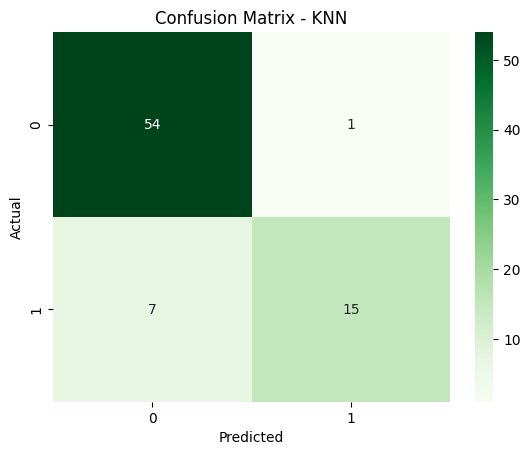

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Melatih model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prediksi
knn_preds = knn_model.predict(X_test)

# Evaluasi
print("Model: K-Nearest Neighbors (K=5)")
print("Akurasi:", accuracy_score(y_test, knn_preds))
print("Classification Report:")
print(classification_report(y_test, knn_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, knn_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Pemodelan Prediksi Kekambuhan Kanker Tiroid dengan Gaussian Naive Bayes

Pada proses pemodelan kali ini, tujuan utamanya adalah untuk mengklasifikasikan kemungkinan kekambuhan (recurrence) kanker tiroid berdasarkan sejumlah fitur klinis dan karakteristik pasien, seperti usia, jenis kelamin, ukuran tumor, tipe kanker, status limfosit, dan jenis pengobatan. Kelas target terdiri dari dua kategori, yaitu: Tidak Kambuh (0) dan Kambuh (1).

Untuk membangun model prediksi ini, digunakan algoritma Gaussian Naive Bayes, yaitu salah satu metode klasifikasi berbasis probabilitas yang mengasumsikan bahwa fitur-fitur data berdistribusi normal dan saling independen antar satu sama lain.



1. Pembagian Data: Data Latih dan Data Uji

Langkah pertama dalam pemodelan adalah membagi data menjadi dua bagian:

* Data Latih (Training Set): digunakan untuk melatih model agar dapat mengenali pola dari data historis.
* Data Uji (Testing Set): digunakan untuk mengevaluasi kemampuan model memprediksi data baru yang belum pernah dilihat.

Dalam eksperimen ini, digunakan rasio pembagian data sebesar 80% data latih dan 20% data uji, yang merupakan salah satu praktik umum dalam pemodelan. Rasio ini bisa disesuaikan tergantung pada jumlah data dan kebutuhan.



2. Menghitung Probabilitas Awal (Prior Probability)

Setelah data terbagi, langkah selanjutnya adalah menghitung probabilitas awal (prior) untuk masing-masing kelas, yaitu berapa peluang kekambuhan atau tidak berdasarkan distribusi kelas dalam data latih:

* Hitung jumlah kasus kambuh dan tidak kambuh.
* Bagi masing-masing jumlah tersebut dengan total data latih.

Hasilnya akan menunjukkan seberapa besar kemungkinan kekambuhan terjadi tanpa mempertimbangkan fitur lainnya.



3. Menghitung Rata-rata dan Standar Deviasi Tiap Fitur

Untuk setiap kelas (`Kambuh` dan `Tidak Kambuh`), dihitung:

* **Rata-rata** dari masing-masing fitur numerik seperti usia pasien, ukuran tumor, dan jumlah kelenjar getah bening positif.
* **Standar deviasi** dari fitur-fitur tersebut untuk mengetahui sebaran nilainya.

Langkah ini penting karena **Gaussian Naive Bayes** menggunakan asumsi bahwa nilai-nilai fitur mengikuti distribusi Gaussian (normal) dalam tiap kelas.



4. Menghitung Probabilitas Gaussian

Dengan menggunakan rumus distribusi Gaussian, probabilitas kemunculan suatu nilai fitur dalam masing-masing kelas dihitung. Rumusnya:

$$
P(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

dimana:

* $x$ adalah nilai fitur pasien,
* $\mu$ adalah rata-rata fitur untuk kelas tertentu,
* $\sigma$ adalah standar deviasi fitur tersebut.

---

5. Menghitung Probabilitas Posterior

Untuk masing-masing kelas, probabilitas gabungan dari semua fitur dihitung dengan mengalikan probabilitas Gaussian tiap fitur dan prior dari kelas tersebut:

$$
P(C_i|X) = P(x_1|C_i) \cdot P(x_2|C_i) \cdot \ldots \cdot P(x_n|C_i) \cdot P(C_i)
$$

dimana:

* $P(x_k|C_i)$ adalah probabilitas fitur ke-k pada kelas ke-i,
* $P(C_i)$ adalah probabilitas awal dari kelas tersebut.


6. Menentukan Kelas Prediksi

Langkah akhir adalah memilih kelas dengan nilai probabilitas posterior terbesar. Kelas tersebut dianggap sebagai hasil prediksi model untuk kasus pasien yang diberikan.



### Kesimpulan

Model Gaussian Naive Bayes bekerja dengan mengasumsikan independensi antar fitur serta distribusi normal, yang membuatnya sangat cepat dan efisien. Dalam kasus prediksi kekambuhan kanker tiroid, model ini mampu memberikan hasil prediktif yang cukup baik, sekaligus mudah diinterpretasi. Dengan menggunakan fitur klinis dasar, model ini dapat membantu dokter atau pihak medis dalam memperkirakan risiko kekambuhan pasien secara otomatis.


Model: Gaussian Naive Bayes
Akurasi: 0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        55
         1.0       0.94      0.73      0.82        22

    accuracy                           0.91        77
   macro avg       0.92      0.85      0.88        77
weighted avg       0.91      0.91      0.91        77



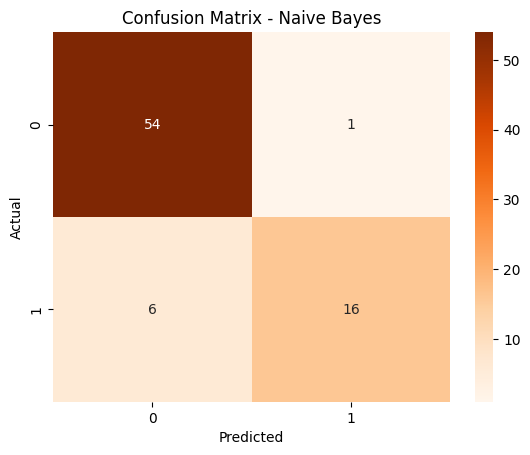

In [43]:
from sklearn.naive_bayes import GaussianNB

# Melatih model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Prediksi
nb_preds = nb_model.predict(X_test)

# Evaluasi
print("Model: Gaussian Naive Bayes")
print("Akurasi:", accuracy_score(y_test, nb_preds))
print("Classification Report:")
print(classification_report(y_test, nb_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, nb_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Evaluasi

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

# --- Decision Tree ---
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

# --- KNN ---
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)

# --- Gaussian Naive Bayes ---
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)

# --- Buat Ringkasan Evaluasi ---
evaluation_results = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN', 'Naive Bayes'],
    'Akurasi': [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_nb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_dt, average='macro'),
        precision_score(y_test, y_pred_knn, average='macro'),
        precision_score(y_test, y_pred_nb, average='macro')
    ],
    'Recall': [
        recall_score(y_test, y_pred_dt, average='macro'),
        recall_score(y_test, y_pred_knn, average='macro'),
        recall_score(y_test, y_pred_nb, average='macro')
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_dt, average='macro'),
        f1_score(y_test, y_pred_knn, average='macro'),
        f1_score(y_test, y_pred_nb, average='macro')
    ]
})


# Tampilkan Hasil
print("=== Hasil Evaluasi Tiga Model ===")
print(evaluation_results)


=== Hasil Evaluasi Tiga Model ===
           Model   Akurasi  Precision    Recall  F1 Score
0  Decision Tree  0.961039   0.974138  0.931818  0.950140
1            KNN  0.896104   0.911373  0.831818  0.860254
2    Naive Bayes  0.909091   0.920588  0.854545  0.879822
